In [1]:
# Import libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
# EDA

In [5]:
df.shape 

(15039, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [10]:
# Data visualization

In [11]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [12]:
# Boxplot

<Axes: >

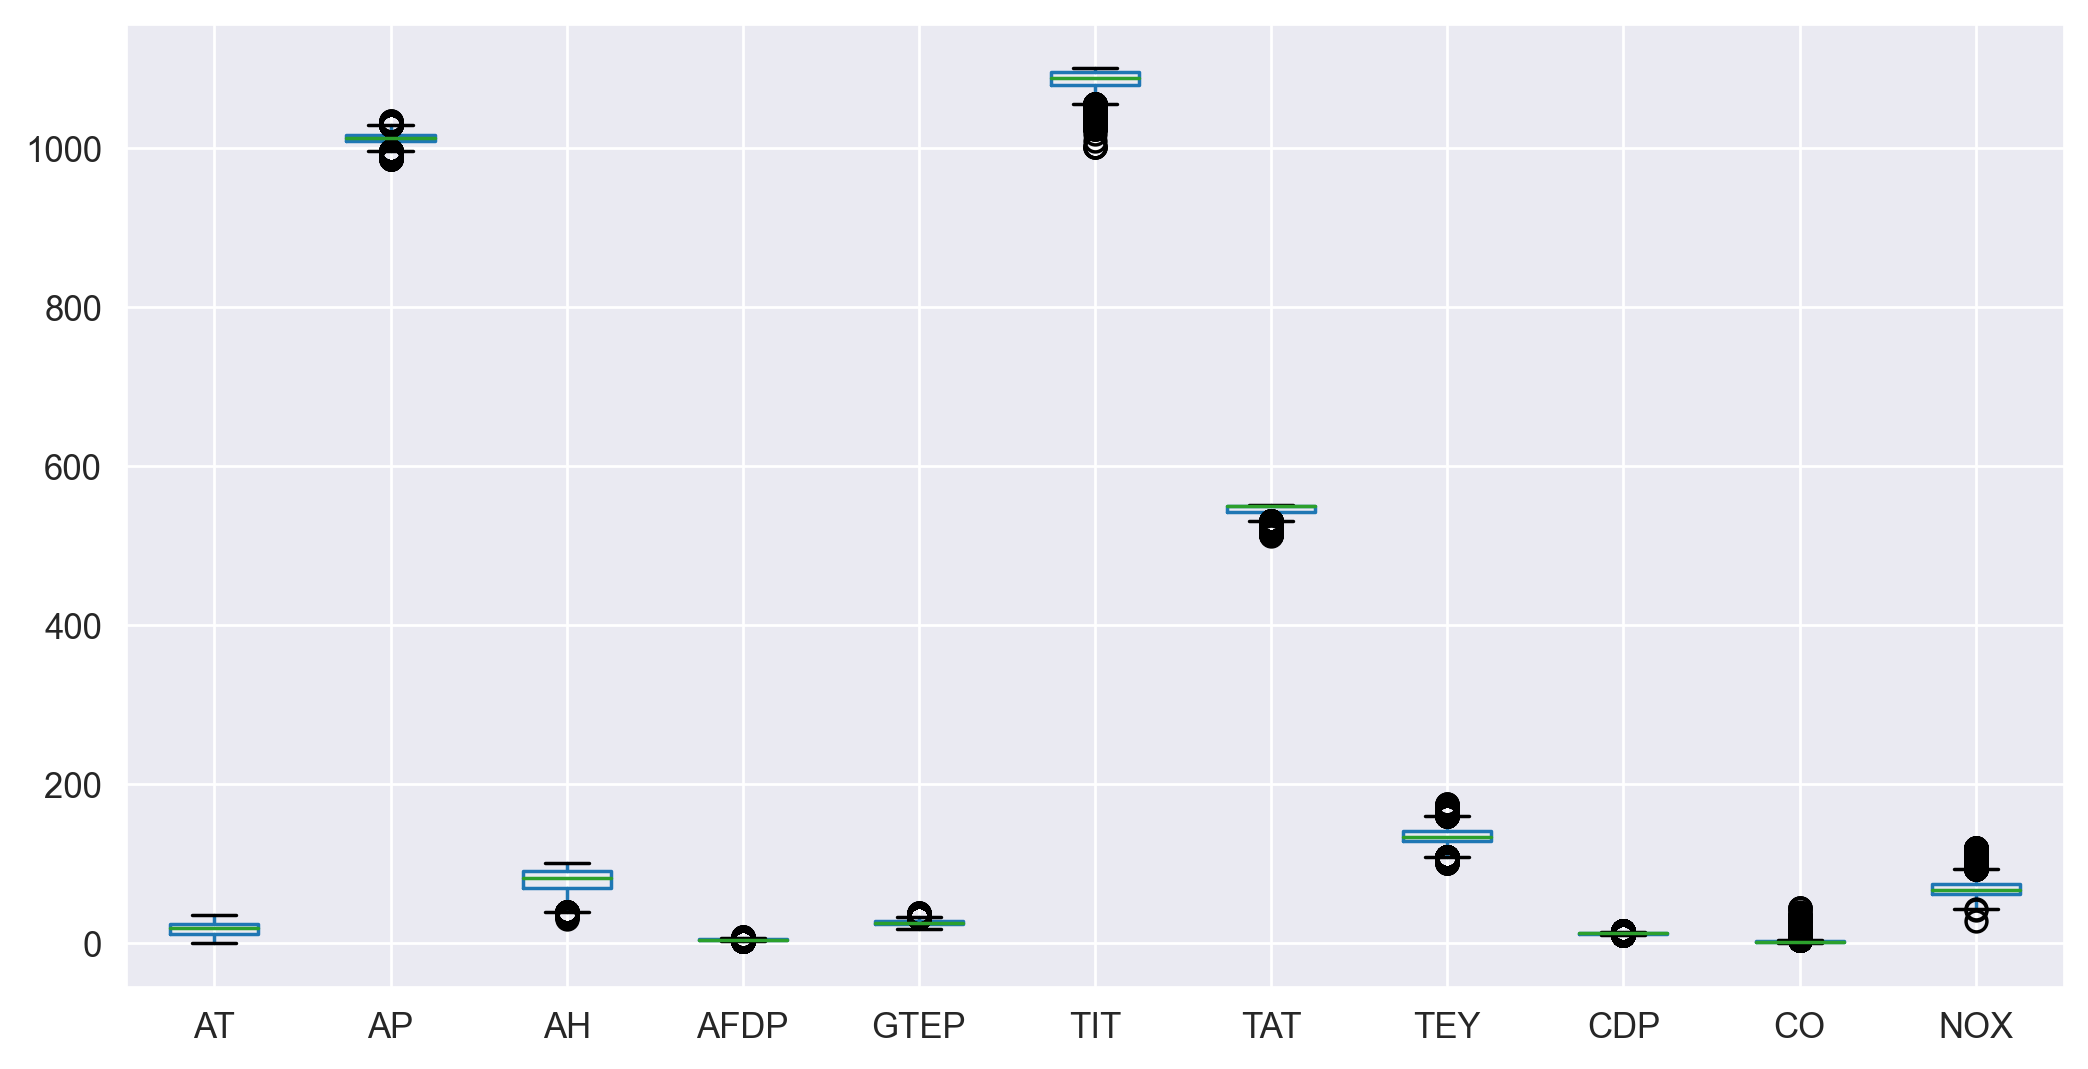

In [13]:
df.boxplot()

In [14]:
# Histogram

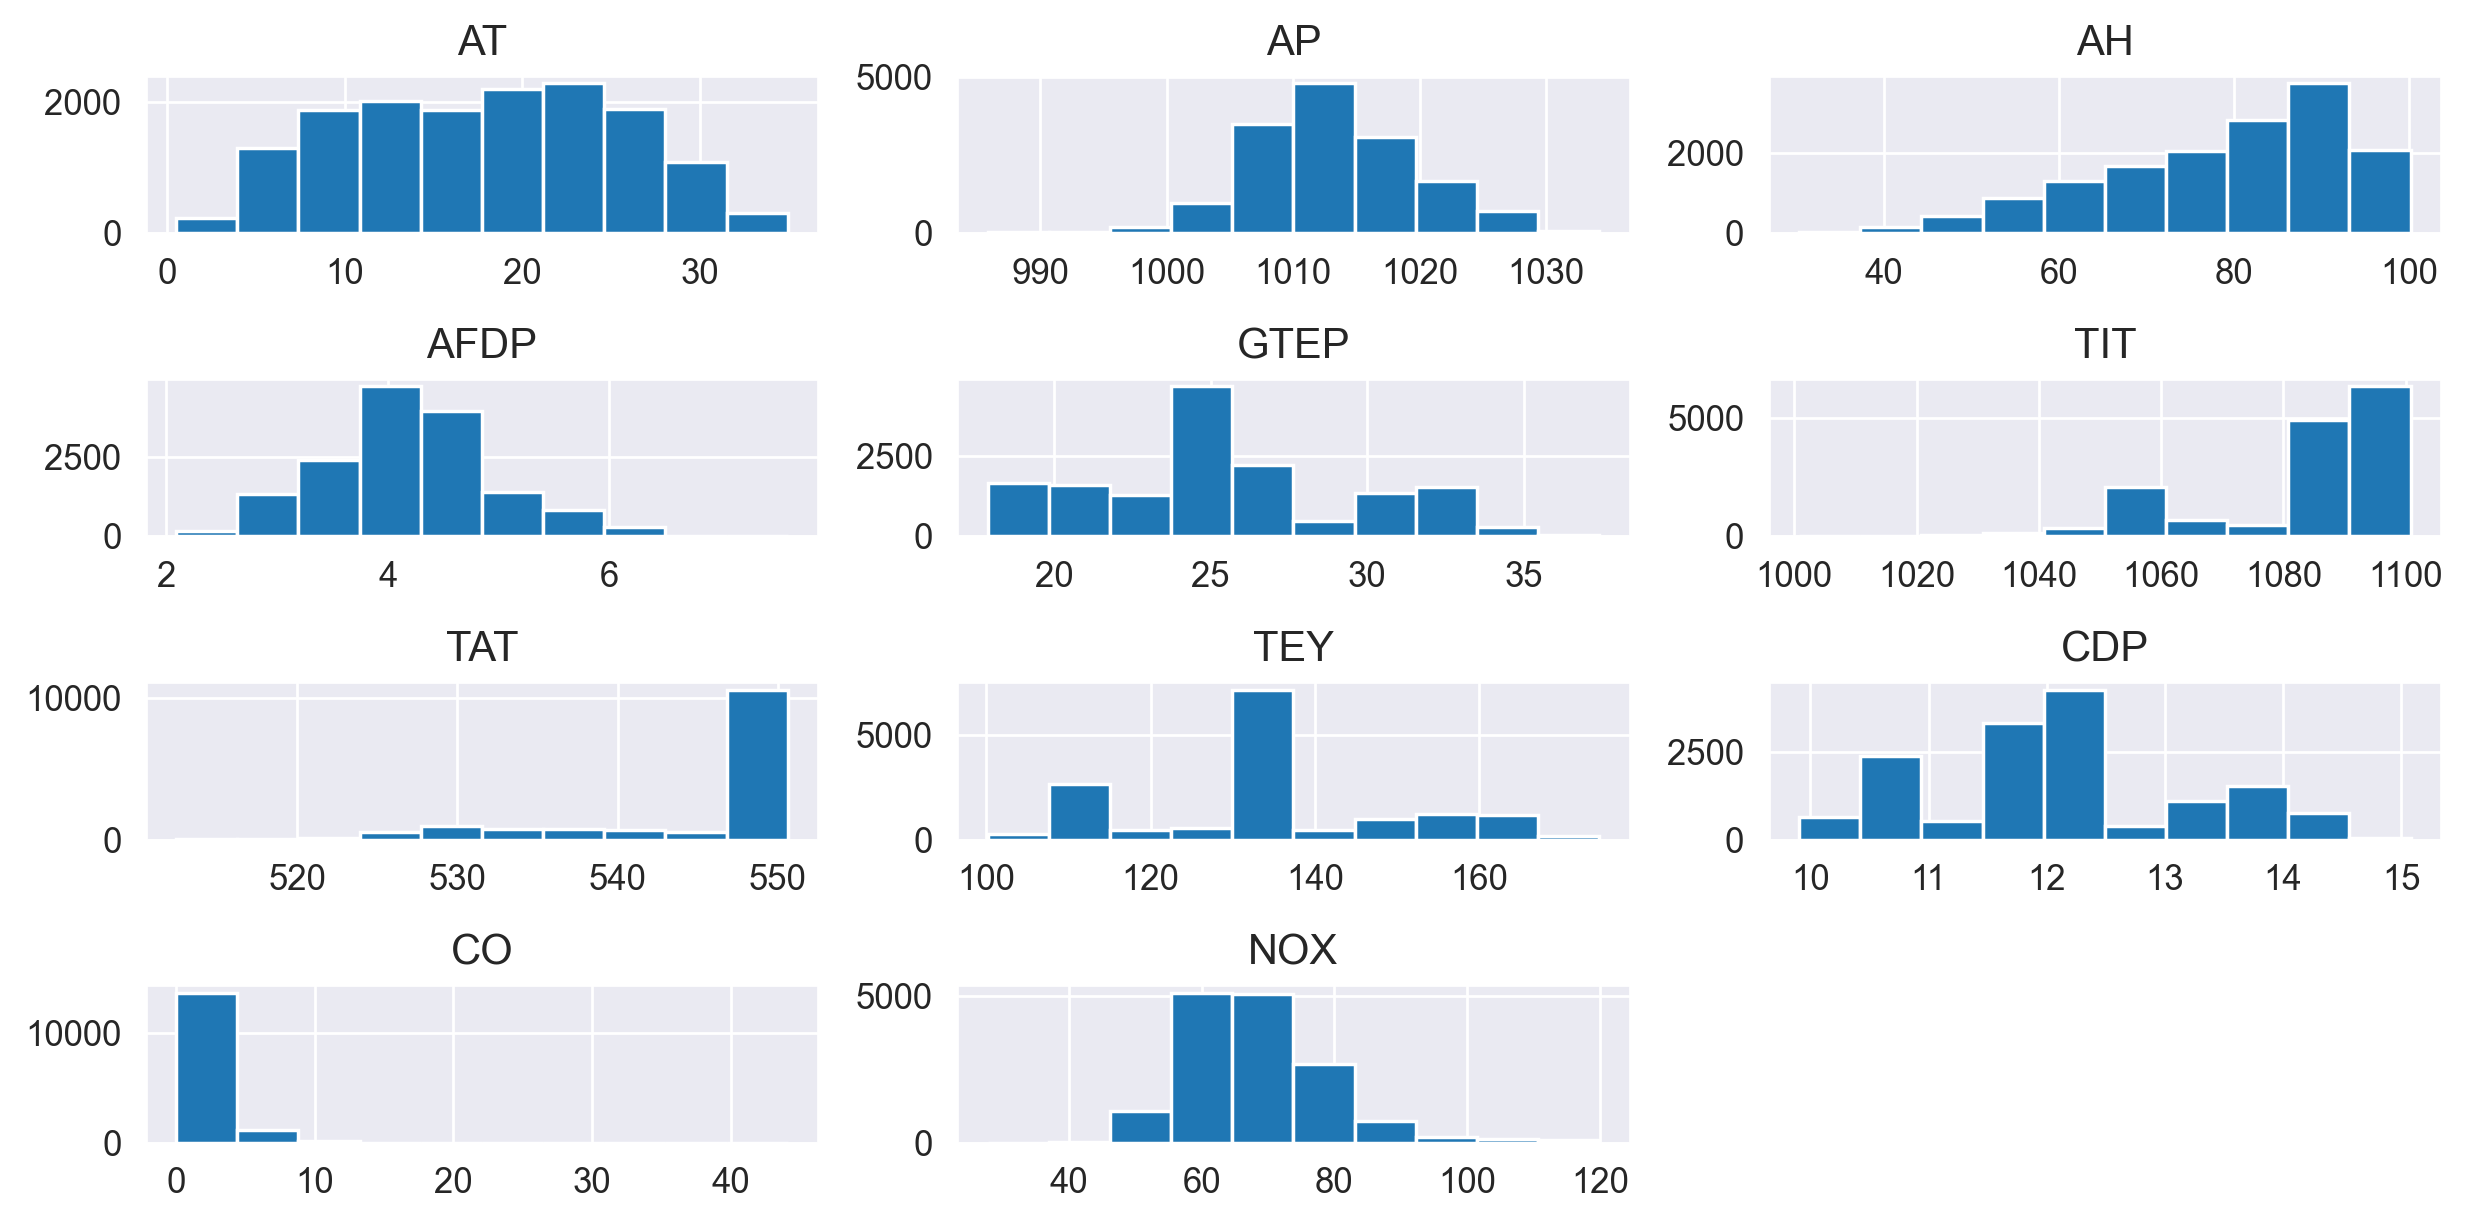

In [15]:
df.hist()
plt.tight_layout()

<Axes: >

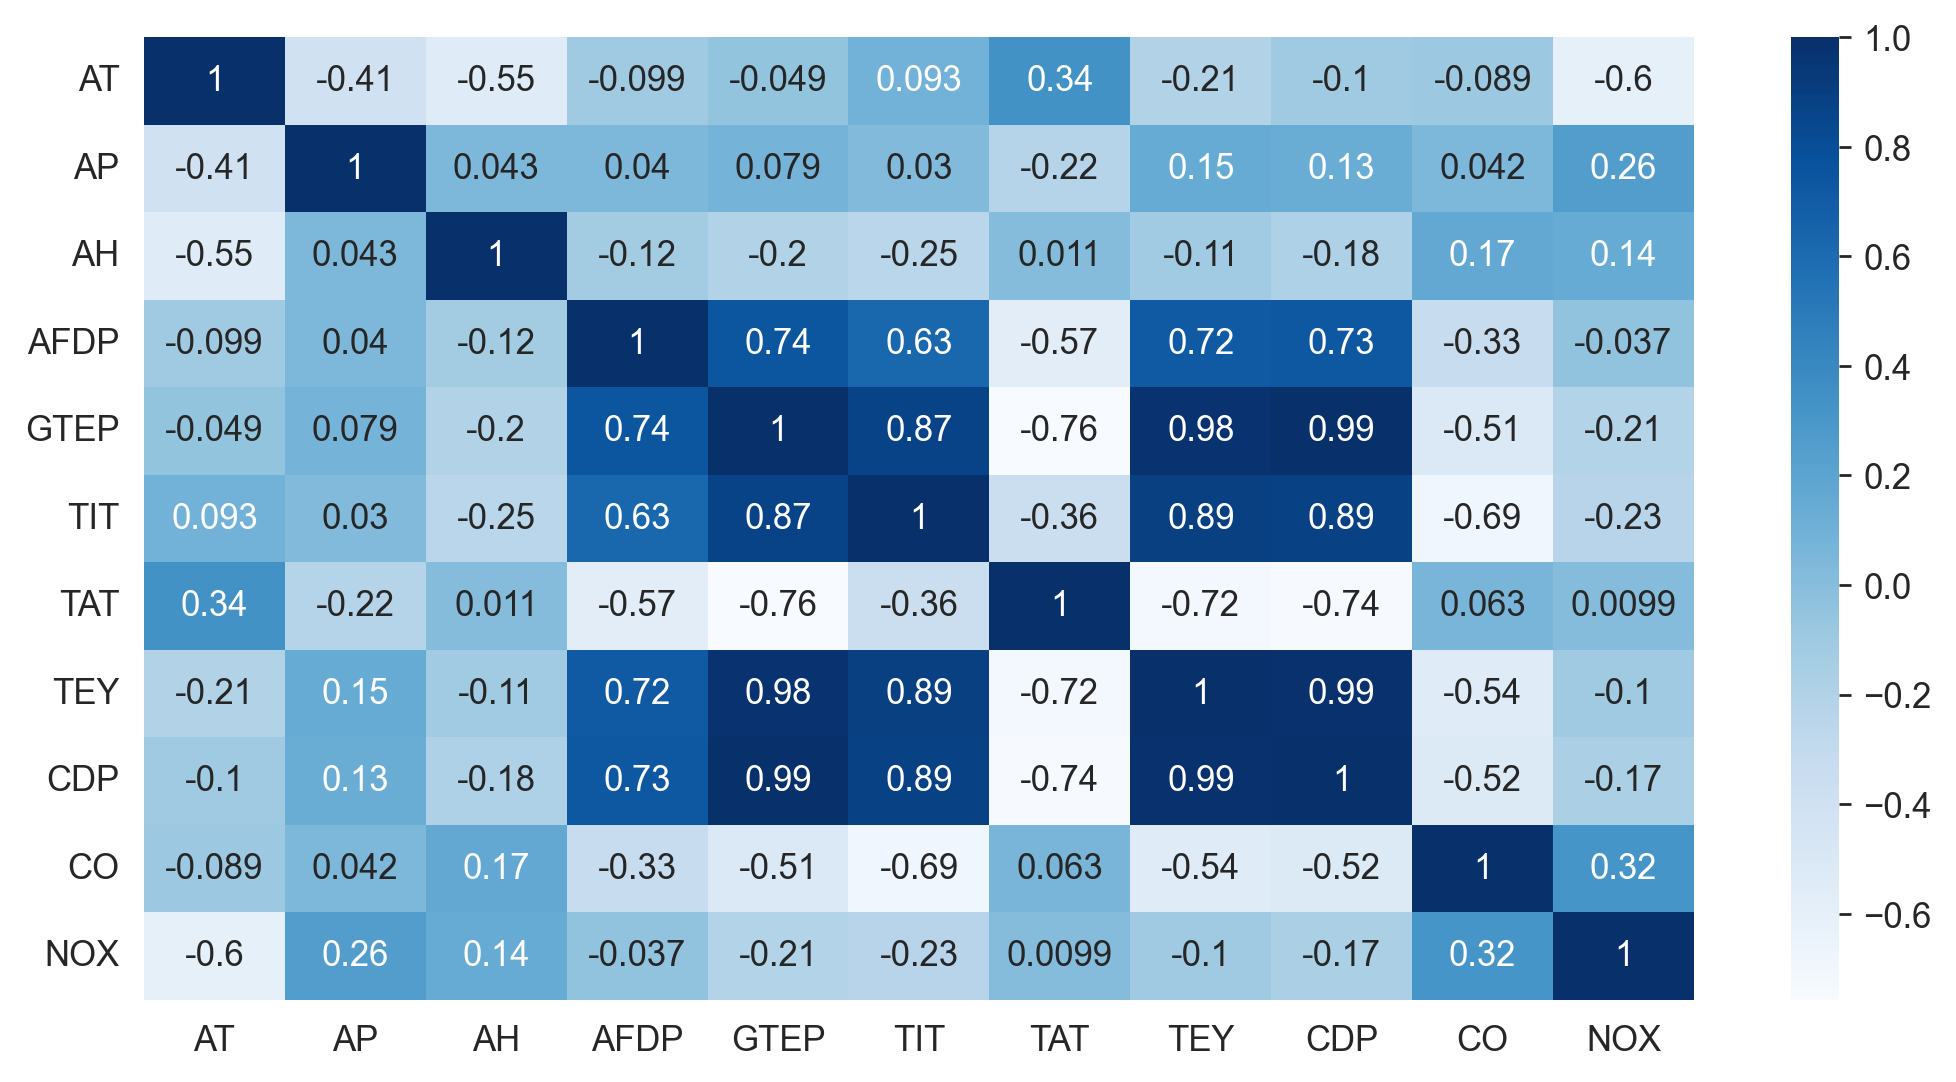

In [16]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [17]:
# Necessary libraries

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [19]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [20]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [21]:
# Standardization

In [22]:
sc = StandardScaler()

x = sc.fit_transform(df)

In [23]:
df = pd.DataFrame(df, columns = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO','NOX'])
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [24]:
x = df.drop('TEY', axis = 1)
y = df['TEY']

In [25]:
# Model building

In [26]:
model = Sequential()

model.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(units = 1, activation = 'linear'))

adam = Adam(learning_rate = 0.01)
model.compile(optimizer = adam, loss = 'mse')

model.fit(x,y, validation_data = (x,y), batch_size = 40, epochs = 50)

Epoch 1/50
376/376 [==============================] - 2s 4ms/step - loss: 3225.5847 - val_loss: 757.1138
Epoch 2/50
376/376 [==============================] - 1s 4ms/step - loss: 2765.0708 - val_loss: 1518.0560
Epoch 3/50
376/376 [==============================] - 1s 4ms/step - loss: 2504.1067 - val_loss: 642.7498
Epoch 4/50
376/376 [==============================] - 1s 3ms/step - loss: 2312.0708 - val_loss: 1833.2838
Epoch 5/50
376/376 [==============================] - 1s 3ms/step - loss: 2170.5056 - val_loss: 1778.6908
Epoch 6/50
376/376 [==============================] - 1s 3ms/step - loss: 2063.1204 - val_loss: 560.1816
Epoch 7/50
376/376 [==============================] - 2s 4ms/step - loss: 1872.8647 - val_loss: 1506.9634
Epoch 8/50
376/376 [==============================] - 2s 5ms/step - loss: 1631.9597 - val_loss: 827.3969
Epoch 9/50
376/376 [==============================] - 2s 4ms/step - loss: 1338.0310 - val_loss: 349.8952
Epoch 10/50
376/376 [==============================

In [47]:
ypred = model.predict(x)
print('Accuracy: ', r2_score(y, ypred))

470/470 [==============================] - 0s 772us/step
Accuracy:  0.828221198602928


**Hyperparameter Tuning**

- Tuning batch size and epochs

In [28]:
# Defining the model

In [29]:
def create_model():
    model = Sequential()
    model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
    
    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'mean_squared_error', optimizer = adam, metrics = ['mse'])
    return model

In [30]:
# Using GridSearchCV

In [31]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

# Define the grid search parameters

param_grids = {
    'batch_size' : [20, 40],
    'epochs'     : [50, 100]
}

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10, scoring = 'neg_mean_squared_error')
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START batch_size=20, epochs=50....................................
94/94 [==============================] - 0s 1ms/step
[CV 1/5; 1/4] END .batch_size=20, epochs=50;, score=-1600.483 total time=  47.2s
[CV 2/5; 1/4] START batch_size=20, epochs=50....................................
94/94 [==============================] - 0s 2ms/step
[CV 2/5; 1/4] END ..batch_size=20, epochs=50;, score=-976.073 total time=  50.0s
[CV 3/5; 1/4] START batch_size=20, epochs=50....................................
94/94 [==============================] - 0s 1ms/step
[CV 3/5; 1/4] END .batch_size=20, epochs=50;, score=-1743.610 total time=  50.7s
[CV 4/5; 1/4] START batch_size=20, epochs=50....................................
94/94 [==============================] - 0s 1ms/step
[CV 4/5; 1/4] END .batch_size=20, epochs=50;, score=-1450.394 total time=  51.1s
[CV 5/5; 1/4] START batch_size=20, epochs=50....................................

In [49]:
# summarize the result

In [33]:
print('Best : {}, using : {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{}, {} with: {}'.format(mean, stdev, param))

Best : -1380.7011358663653, using : {'batch_size': 20, 'epochs': 100}
-1380.7012699089187, 286.34615721159923 with: {'batch_size': 20, 'epochs': 50}
-1380.7011358663653, 286.34612458753105 with: {'batch_size': 20, 'epochs': 100}
-1380.7011358663653, 286.34612458753105 with: {'batch_size': 40, 'epochs': 50}
-1380.7011358663653, 286.34612458753105 with: {'batch_size': 40, 'epochs': 100}


- Tuning the learning rate Dropout rate

In [34]:
def create_model(learning_rate, dropout_rate):
    model = Sequential()
    model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units = 1, activation = 'linear'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error', optimizer = adam, metrics = [])
    return model

# Create the model 

model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 20, epochs = 50)

# Define the grid search parameters

param_grids = {
    'learning_rate' : [0.01, 0.1],
    'dropout_rate'  : [0.1, 0.2]
}

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10, scoring = 'neg_mean_squared_error')
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START dropout_rate=0.1, learning_rate=0.01........................
94/94 [==============================] - 0s 1ms/step
[CV 1/5; 1/4] END dropout_rate=0.1, learning_rate=0.01;, score=-1600.483 total time= 1.0min
[CV 2/5; 1/4] START dropout_rate=0.1, learning_rate=0.01........................
94/94 [==============================] - 0s 1ms/step
[CV 2/5; 1/4] END dropout_rate=0.1, learning_rate=0.01;, score=-976.073 total time= 1.0min
[CV 3/5; 1/4] START dropout_rate=0.1, learning_rate=0.01........................
94/94 [==============================] - 0s 709us/step
[CV 3/5; 1/4] END dropout_rate=0.1, learning_rate=0.01;, score=-1743.610 total time=  43.8s
[CV 4/5; 1/4] START dropout_rate=0.1, learning_rate=0.01........................
94/94 [==============================] - 0s 879us/step
[CV 4/5; 1/4] END dropout_rate=0.1, learning_rate=0.01;, score=-1450.393 total time=  21.9s
[CV 5/5; 1/4] START dropout_rate=

In [35]:
# Summarize the results

In [36]:
print('Best : {}, using : {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{}, {} with: {}'.format(mean, stdev, param))

Best : -1380.7011358663653, using : {'dropout_rate': 0.1, 'learning_rate': 0.01}
-1380.7011358663653, 286.34612458753105 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-1380.7011358663653, 286.34612458753105 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-1380.7011358663653, 286.34612458753105 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-1380.7011358663653, 286.34612458753105 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


- Tuning Activation Function and Kernel Initializer

In [37]:
# Defining the model

In [38]:
def create_model(activation_function, init):
    model = Sequential()
    model.add(Dense(units = 12, kernel_initializer = init, activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(units = 8, kernel_initializer = init, activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(units = 1, activation = 'linear'))
    
    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'mean_squared_error', optimizer = adam, metrics = ['mse'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 20, epochs = 50)

# Define the grid search parameters

param_grids = {
    'activation_function' : ['relu', 'linear'],
    'init' : ['uniform', 'normal']
}

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10, scoring = 'neg_mean_squared_error')
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START activation_function=relu, init=uniform......................
94/94 [==============================] - 0s 848us/step
[CV 1/5; 1/4] END activation_function=relu, init=uniform;, score=-1600.483 total time=  29.0s
[CV 2/5; 1/4] START activation_function=relu, init=uniform......................
94/94 [==============================] - 0s 919us/step
[CV 2/5; 1/4] END activation_function=relu, init=uniform;, score=-976.073 total time=  29.0s
[CV 3/5; 1/4] START activation_function=relu, init=uniform......................
94/94 [==============================] - 0s 1ms/step
[CV 3/5; 1/4] END activation_function=relu, init=uniform;, score=-1743.610 total time=  30.7s
[CV 4/5; 1/4] START activation_function=relu, init=uniform......................
94/94 [==============================] - 0s 1ms/step
[CV 4/5; 1/4] END activation_function=relu, init=uniform;, score=-1450.393 total time=  29.0s
[CV 5/5; 1/4] START activ

In [39]:
# Summarize the results

In [40]:
print('Best : {}, using : {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{}, {} with: {}'.format(mean, stdev, param))

Best : -1380.7011358663653, using : {'activation_function': 'relu', 'init': 'uniform'}
-1380.7011358663653, 286.34612458753105 with: {'activation_function': 'relu', 'init': 'uniform'}
-1380.7011358663653, 286.34612458753105 with: {'activation_function': 'relu', 'init': 'normal'}
-1380.716612700939, 286.3393604437553 with: {'activation_function': 'linear', 'init': 'uniform'}
-1380.702964803124, 286.3455323414593 with: {'activation_function': 'linear', 'init': 'normal'}


- Tuning Number of neurons in Activation layer

In [41]:
# Defining the model 

In [42]:
def create_model(neuron1, neuron2):
    model = Sequential()
    model.add(Dense(units = neuron1, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units = neuron2, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units = 1, activation = 'linear'))
    
    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'mean_squared_error', optimizer = adam, metrics = ['mse'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 20, epochs = 50)

# Define the grid search parameter

param_grids = {
    'neuron1' : [4,8],
    'neuron2' : [2,4]
}

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START neuron1=4, neuron2=2........................................
94/94 [==============================] - 0s 2ms/step
[CV 1/5; 1/4] END .....neuron1=4, neuron2=2;, score=-1600.483 total time=  41.2s
[CV 2/5; 1/4] START neuron1=4, neuron2=2........................................
94/94 [==============================] - 0s 912us/step
[CV 2/5; 1/4] END ......neuron1=4, neuron2=2;, score=-976.073 total time=  38.9s
[CV 3/5; 1/4] START neuron1=4, neuron2=2........................................
94/94 [==============================] - 0s 855us/step
[CV 3/5; 1/4] END .....neuron1=4, neuron2=2;, score=-1743.610 total time=  31.4s
[CV 4/5; 1/4] START neuron1=4, neuron2=2........................................
94/94 [==============================] - 0s 970us/step
[CV 4/5; 1/4] END .....neuron1=4, neuron2=2;, score=-1450.393 total time=  30.9s
[CV 5/5; 1/4] START neuron1=4, neuron2=2..................................

In [43]:
# Summarize the result

In [44]:
print('Best : {}, using : {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{}, {} with: {}'.format(mean, stdev, param))

Best : -1380.7011358663653, using : {'neuron1': 4, 'neuron2': 2}
-1380.7011358663653, 286.34612458753105 with: {'neuron1': 4, 'neuron2': 2}
-1380.7011358663653, 286.34612458753105 with: {'neuron1': 4, 'neuron2': 4}
-1380.7011358663653, 286.34612458753105 with: {'neuron1': 8, 'neuron2': 2}
-1380.7011358663653, 286.34612458753105 with: {'neuron1': 8, 'neuron2': 4}


- Final model with optimum values of Hyperparameters

In [45]:
model = Sequential()
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(units = 1, activation = 'linear'))
    
adam = Adam(learning_rate = 0.01)
model.compile(optimizer = adam, loss = 'mse')

model.fit(x,y, validation_data=(x,y), batch_size=40, epochs=50)

Epoch 1/50
376/376 [==============================] - 1s 2ms/step - loss: 4003.2673 - val_loss: 933.5906
Epoch 2/50
376/376 [==============================] - 1s 2ms/step - loss: 3423.9980 - val_loss: 832.9658
Epoch 3/50
376/376 [==============================] - 1s 2ms/step - loss: 3034.7209 - val_loss: 432.6846
Epoch 4/50
376/376 [==============================] - 1s 2ms/step - loss: 2572.6624 - val_loss: 403.9364
Epoch 5/50
376/376 [==============================] - 1s 2ms/step - loss: 2165.9927 - val_loss: 327.3311
Epoch 6/50
376/376 [==============================] - 1s 2ms/step - loss: 1683.8361 - val_loss: 241.1429
Epoch 7/50
376/376 [==============================] - 1s 2ms/step - loss: 1426.5243 - val_loss: 183.6008
Epoch 8/50
376/376 [==============================] - 1s 2ms/step - loss: 1360.0526 - val_loss: 144.6853
Epoch 9/50
376/376 [==============================] - 1s 2ms/step - loss: 1332.4272 - val_loss: 160.5470
Epoch 10/50
376/376 [==============================] - 

In [46]:
ypred = model.predict(x)
print('Accuracy: ', r2_score(y, ypred)) 

470/470 [==============================] - 0s 781us/step
Accuracy:  0.828221198602928
